# **도표 12-1. z-점수 계산 파이썬코드**
이 코드의 주요 목적은 서비스 수준 90%에 해당하는 z-점수를 찾는 것입니다. z-점수는 정규 분포에서 특정 확률에 해당하는 값의 위치를 나타내며, 여기서는 90% 확률에 해당하는 위치를 찾는 것입니다. 이 값은 재고 관리, 품질 관리 등 다양한 분야에서 중요한 의사결정을 위해 사용됩니다. 예를 들어, 재고 관리에서는 이 z-점수를 사용하여 안전 재고 수준을 결정할 수 있습니다.

In [7]:
from scipy.stats import norm  # scipy 라이브러리의 stats 모듈에서 norm(정규 분포 관련 함수)를 불러옵니다.
import numpy as np

# 서비스 수준 90%에 해당하는 z-점수 찾기
service_level = 0.90  # 서비스 수준을 90% (또는 0.90)로 설정한다. 이는 원하는 정확도 또는 확률을 의미한다.
z_score = norm.ppf(service_level)  # norm.ppf 함수는 주어진 확률에 해당하는 z-점수를 찾아준다.
# z-점수는 정규분포에서 특정 확률을 갖는 값의 위치를 나타내며, 이 경우에는 90% 확률에 해당하는 값을 찾아준다.

z_score  # 계산된 z-점수를 출력한다. 이 값은 특정 확률(여기서는 90%)에 해당하는 정규 분포 상의 값이다.


1.2815515655446004

# **도표 12-2. z-점수에 기반하여 안전재고 수량 계산 파이썬 코드**

이 코드는 세탁기 물류센터의 재고 관리를 위해 필요한 안전재고 수량을 계산하는 데 사용됩니다. 이 계산은 공급 리드타임과 일일 수요의 변동성을 고려하여, 주문 과정에서 발생할 수 있는 불확실성을 최소화하기 위해 필요한 재고 수준을 결정합니다.

In [8]:
import numpy as np           # 수학적 계산을 위한 라이브러리
# 안전재고 계산을 위해 필요한 변수를 정의한다.
mean_demand = 150  # 일일 평균 수요량
std_demand = 10    # 일일 수요량의 표준편차
mean_lead_time = 6 # 공급 리드타임의 평균 (물건이 공급되기까지 걸리는 시간)
std_lead_time = 1  # 공급 리드타임의 표준편차

# 안전재고= z-점수 * 루트((공급 리드타임 평균 * 수요 표준편차의 제곱) + (수요 평균의 제곱 * 공급 리드타임 표준편차의 제곱))
safety_stock = z_score * np.sqrt((mean_lead_time * std_demand**2) + (mean_demand**2 * std_lead_time**2))

safety_stock_rounded = round(safety_stock)  # round 함수는 주어진 숫자를 가장 가까운 정수로 반올림한다.
safety_stock_rounded  # 계산된 안전재고 값을 출력한다.

195

# **도표 12-3. 수요량 계산 파이썬 코드**
이 코드는 물류센터에서 특정 기간 동안 필요한 세탁기의 수요량을 계산하는 데 사용됩니다. 첫 두 날에는 각각 100개와 200개의 수요가 있으며, 그 이후의 날짜에는 평균 수요량을 사용하여 전체 기간 동안 필요한 수요량을 예측합니다.

In [9]:
# 필요한 변수를 정의합니다.
Y = 10  # Y값은 일정 기간을 나타내며, 여기서는 10일을 의미합니다.
order_interval = 8  # 오더주문간격은 발주가 이루어지는 주기를 의미하며, 여기서는 8일 간격입니다.
inventory_review_cycle = 8  # 재고점검주기도 8일 간격입니다.

# 전체 계산 기간을 정의합니다.
# 이는 Y값, 평균 공급 리드타임(물품이 공급되는데 걸리는 평균 시간), 그리고 오더주문간격의 합으로 계산됩니다.
total_days = Y + mean_lead_time + order_interval

# 일자별 수요를 계산합니다.
# 1일차는 100개, 2일차는 200개, 그리고 나머지 일자는 평균 수요량으로 설정합니다.
# 여기서 mean_demand는 이전 코드에서 정의된 일일 평균 수요량을 나타냅니다.
daily_demand = [100, 200] + [mean_demand] * (total_days - 2)

# 계산된 일자별 수요를 출력합니다.
daily_demand
print(" ".join(map(str, daily_demand)))

100 200 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150 150


# **도표 12-4. 총 수요량을 합산하는 파이썬 코드**
이 코드는 각 일자별로 필요한 최대재고와 발주점을 계산하기 위해 특정 기간 동안의 총 수요량을 합산합니다. 최대재고는 향후 공급 리드타임과 오더주문간격 동안 필요한 수요의 합계를, 발주점은 향후 공급 리드타임과 재고점검주기의 절반 기간 동안 필요한 수요의 합계를 계산하는 데 사용됩니다.

In [10]:
# 최대재고는 안전재고와 특정 기간 동안의 수요 합계로 계산된다.
max_inventory_demand_sum = [
    sum(daily_demand[t:t+mean_lead_time+order_interval])  # t일부터 (t + mean_lead_time + order_interval)일까지의 수요 합계
    for t in range(total_days)  # total_days는 전체 계산할 일수를 나타냅니다.
]

# 발주점은 안전재고와 특정 기간(t + mean_lead_time + 재고점검주기의 절반)동안의 수요 합계로 계산됩니다.
reorder_point_demand_sum = [
    sum(daily_demand[t:t+mean_lead_time+int(inventory_review_cycle*0.5)])  # t일부터 트정 기간일까지의 수요 합계
    for t in range(total_days)               # total_days는 전체 계산할 일수를 나타냅니다.
]

max_inventory_demand_sum, reorder_point_demand_sum # 최대재고와 수요 합계를 출력한다.
print("최대재고: " + " ".join(map(str, max_inventory_demand_sum)))    # 계산된 최대재고의 값을 가로로 출력
print("수요합계: " + " ".join(map(str, reorder_point_demand_sum)))    # 발주점을 위한 수요 합계 을 가로로 출력



최대재고: 2100 2150 2100 2100 2100 2100 2100 2100 2100 2100 2100 1950 1800 1650 1500 1350 1200 1050 900 750 600 450 300 150
수요합계: 1500 1550 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1500 1350 1200 1050 900 750 600 450 300 150


# **도표12-5. 리스트를 데이터프레임으로 변환하는 파이썬 코드**

In [11]:
import pandas as pd

inventory_calculations_df = pd.DataFrame({
    'Day': range(1, total_days + 1),
    'Max Inventory Demand Sum': max_inventory_demand_sum,
    'Reorder Point Demand Sum': reorder_point_demand_sum
})
inventory_calculations_df.head()

,Day,Max Inventory Demand Sum,Reorder Point Demand Sum
0,1,2100,1500
1,2,2150,1550
2,3,2100,1500
3,4,2100,1500
4,5,2100,1500


In [12]:
type(inventory_calculations_df)

pandas.core.frame.DataFrame

In [13]:
range(total_days)

range(0, 24)

In [14]:
daily_demand[0:14]

[100, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150]

In [15]:
# daily_demand 리스트에서 특정 부분을 선택합니다.
# 슬라이싱을 사용하여 0번 인덱스부터 13번 인덱스까지의 요소를 선택합니다.
# 파이썬에서 인덱스는 0부터 시작하며, daily_demand[0:14]는 0번 요소(첫 번째 요소)부터 14번 요소 바로 앞까지(즉, 13번 요소까지)의 요소들을 선택합니다.
# 결과적으로 이 코드는 daily_demand 리스트의 첫 14개 요소를 선택합니다.
daily_demand[0:14]


[100, 200, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150]

# **도표 12-6 일자별 최대재고와 발주점 계산 파이썬 코드**
아래 코드는 각 일자별로 최대재고와 발주점을 계산하는 과정을 보여줍니다.
여기서 사용된 리스트 내포(list comprehension)는 파이썬의 강력한 기능 중 하나로, 반복문과 조건문을 한 줄에 간결하게 표현할 수 있게 해줍니다. 이 코드에서는 max_inventory_demand_sum과 reorder_point_demand_sum 리스트의 각 요소에 대해 반복하면서, 각 일자별로 안전재고를 더해 최대재고와 발주점을 계산하고 있습니다.

In [16]:
# 리스트 내포(list comprehension)를 사용하여 각 일자별로 최대재고와 발주점을 계산합니다.

# 최대재고는 '안전재고'에 각 일자별 '최대재고를 위한 수요 합계’를 더한 값이다.
max_inventory = [safety_stock_rounded + demand_sum for demand_sum in max_inventory_demand_sum]

# 발주점 계산
# 발주점은 '안전재고'에 각 일자별 '발주점을 위한 수요 합계'를 더한 값이다.
reorder_point = [safety_stock_rounded + demand_sum for demand_sum in reorder_point_demand_sum]

# 계산된 최대재고와 발주점의 리스트를 DataFrame으로 변환하여 가독성 있게 출력한다.
inventory_calculations_df = pd.DataFrame({
    'Day': range(1, total_days + 1),
    'Max Inventory': max_inventory,
    'Reorder Point': reorder_point
})

inventory_calculations_df.head()


,Day,Max Inventory,Reorder Point
0,1,2295,1695
1,2,2345,1745
2,3,2295,1695
3,4,2295,1695
4,5,2295,1695


In [17]:
max_inventory_demand_sum[0]

2100

In [18]:
max_inventory[0]

2295

# 도표 12-7. 가용재고, 발주량, 입고예정량 계산 파이썬 코드
아래 코드는 일자별로 기초재고와 가용재고, 그리고 발주량을 계산하는 과정을 수행한다. 초기 기초재고와 입고예정량을 설정한 후, 각 일자별로 수요에 따라 재고가 변하는 것을 계산한다. 발주량은 특정 주기(오더주문간격)에 따라 발주가 이루어지며, 이는 가용재고가 발주점 이하로 떨어졌을 때 발생한다.

In [19]:
# 기초재고 및 가용재고 계산을 위한 초기 설정
initial_inventory = 1000  # 초기 기초재고 설정 (첫 날의 시작 재고)
initial_scheduled_receipt = 800  # 초기 입고예정량 설정 (첫 날 도착 예정인 재고)
# 기초재고 및 가용재고 리스트 초기화
beginning_inventory = [0] * total_days  # 각 일자별 기초재고를 저장할 리스트 초기화
available_inventory = [0] * total_days  # 각 일자별 가용재고를 저장할 리스트 초기화
scheduled_receipt = [0] * total_days    # 각 일자별 입고예정량을 저장할 리스트 초기화
order_quantity = [0] * total_days       # 각 일자별 발주량을 저장할 리스트 초기화

# 첫 날의 기초재고 및 가용재고
beginning_inventory[0] = initial_inventory  # 첫 날의 기초재고는 초기 기초재고로 설정
available_inventory[0] = initial_inventory + initial_scheduled_receipt  # 첫 날의 가용재고는 초기 기초재고와 입고예정량의 합으로 설정
# 발주량 및 입고예정량 계산
for day in range(1, total_days):  # 전체 계산 일자에 대해 반복
    if day >= mean_lead_time:  # 공급 리드타임 이후부터는
        scheduled_receipt[day]=order_quantity[day - mean_lead_time]  #입고예정량은 mean_lead_time 일 전의 발주량으로 설정
    # 기초재고 및 가용재고 계산
    beginning_inventory[day]=available_inventory[day-1]-daily_demand[day-1]  #기초재고=전날가용재고-전날수요
    available_inventory[day] = beginning_inventory[day] + scheduled_receipt[day]  # 가용재고 = 기초재고 + 입고예정량

    # 발주량 계산
    if day % order_interval == 1:  # 2일차부터 오더주문간격이 지난 날짜에 발주
        temp_order_quantity = max_inventory[day] - available_inventory[day] if available_inventory[day] <= reorder_point[day] else 0
        order_quantity[day] = temp_order_quantity  # 발주량 설정

available_inventory, order_quantity # available_inventory, order_quantity를 DataFrame으로 변환하여 가독성 있게 출력
inventory_status_df = pd.DataFrame({
    'Day': range(1, total_days + 1),
    'Available Inventory': available_inventory,
    'Order Quantity': order_quantity
})
inventory_status_df.head()

,Day,Available Inventory,Order Quantity
0,1,1800,0
1,2,1700,645
2,3,1500,0
3,4,1350,0
4,5,1200,0


In [20]:
beginning_inventory[1]

1700

# **도표 12-8. 후보충량 결과 데이터프레임 정리 파이썬 코드**
아래 코드는 데이터 프레임을 사용하여 일자별 수요, 최대재고, 발주점, 안전재고, 기초재고, 가용재고, 발주량을 구조화된 형태로 정리한다. 그리고, 첫 번째 날의 최대재고와 가용재고가 특정 값(여기서는 2295와 1800)과 일치하는지 여부를 확인한다.

In [21]:
import pandas as pd

# 각 종류의 재고 관련 데이터를 딕셔너리 형태로 준비합니다.
inventory_data = {
    "Day": range(1, total_days + 1),  # 'Day' 열에는 1부터 총 일수(total_days)까지의 숫자를 넣습니다.
    "Demand": daily_demand,  # 'Demand' 열에는 일자별 수요량(daily_demand)을 넣습니다.
    "Max Inventory": max_inventory,  # 'Max Inventory' 열에는 일자별 최대재고(max_inventory)를 넣습니다.
    "Reorder Point": reorder_point,  # 'Reorder Point' 열에는 일자별 발주점(reorder_point)을 넣습니다.
    "Safety Stock": [safety_stock_rounded] * total_days,  # 'Safety Stock' 열에는 안전재고량(safety_stock_rounded)을 각 일자별로 반복하여 넣습니다.
    "Beginning Inventory": beginning_inventory,  # 'Beginning Inventory' 열에는 일자별 기초재고(beginning_inventory)를 넣습니다.
    "Available Inventory": available_inventory,  # 'Available Inventory' 열에는 일자별 가용재고(available_inventory)를 넣습니다.
    "Order Quantity": order_quantity  # 'Order Quantity' 열에는 일자별 발주량(order_quantity)을 넣습니다.
}

# 준비된 데이터를 이용하여 데이터 프레임을 생성합니다.
inventory_df = pd.DataFrame(inventory_data)

# 최종 점검을 수행합니다.
# 첫 번째 날의 최대재고가 2295인지 확인합니다.
check_max_inventory_day1 = inventory_df.loc[0, "Max Inventory"] == 2295
# 첫 번째 날의 가용재고가 1800인지 확인합니다.
check_available_inventory_day1 = inventory_df.loc[0, "Available Inventory"] == 1800

# 생성된 데이터 프레임과 점검 결과를 출력합니다.
print("첫 번째 날의 최대재고가 2295인지 확인: ", check_max_inventory_day1)
print("첫 번째 날의 가용재고가 1800인지 확인: ", check_available_inventory_day1)
inventory_df.head()

첫 번째 날의 최대재고가 2295인지 확인:  True
첫 번째 날의 가용재고가 1800인지 확인:  True


,Day,Demand,Max Inventory,Reorder Point,Safety Stock,Beginning Inventory,Available Inventory,Order Quantity
0,1,100,2295,1695,195,1000,1800,0
1,2,200,2345,1745,195,1700,1700,645
2,3,150,2295,1695,195,1500,1500,0
3,4,150,2295,1695,195,1350,1350,0
4,5,150,2295,1695,195,1200,1200,0


# **도표 12-9. 처음 10일동안의 후보충 계산 결과 파이썬 코드**

In [22]:
# 앞서 생성된 'inventory_df' 데이터 프레임에서 처음 10일 동안의 데이터만을 추출합니다.
# 'head' 함수는 데이터 프레임의 상위 N개의 행을 반환합니다. 여기서 N은 함수에 전달된 숫자입니다.
# 따라서 'inventory_df.head(10)'는 'inventory_df'의 처음 10개 행을 반환합니다.
inventory_df_10_days = inventory_df.head(10)

# 추출된 데이터를 출력합니다.
# 이 결과는 처음 10일 동안의 수요, 최대재고, 발주점, 안전재고, 기초재고, 가용재고, 발주량 등을 보여줍니다.
inventory_df_10_days

,Day,Demand,Max Inventory,Reorder Point,Safety Stock,Beginning Inventory,Available Inventory,Order Quantity
0,1,100,2295,1695,195,1000,1800,0
1,2,200,2345,1745,195,1700,1700,645
2,3,150,2295,1695,195,1500,1500,0
3,4,150,2295,1695,195,1350,1350,0
4,5,150,2295,1695,195,1200,1200,0
5,6,150,2295,1695,195,1050,1050,0
6,7,150,2295,1695,195,900,900,0
7,8,150,2295,1695,195,750,1395,0
8,9,150,2295,1695,195,1245,1245,0
9,10,150,2295,1695,195,1095,1095,1200


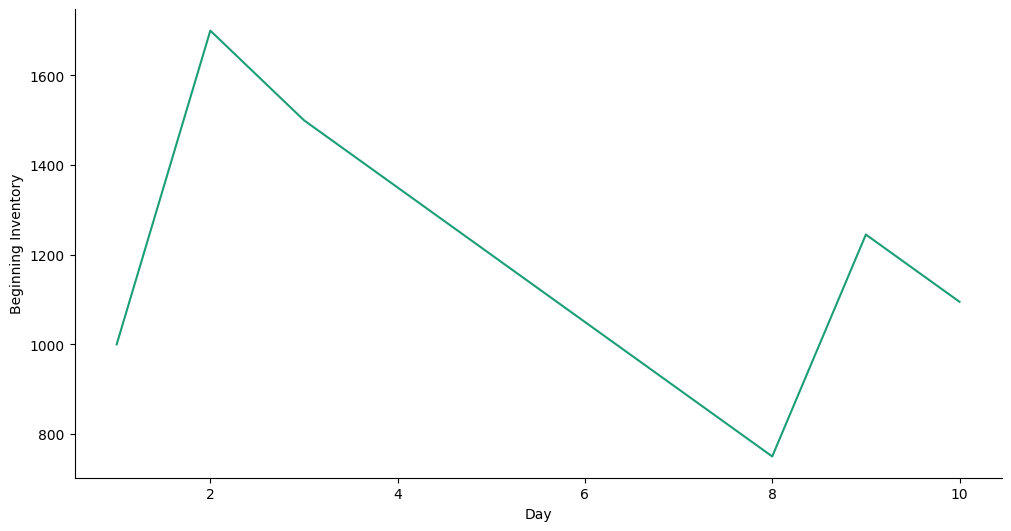

In [23]:
# @title Day vs Beginning Inventory

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Day']
  ys = series['Beginning Inventory']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = inventory_df_10_days.sort_values('Day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Day')
_ = plt.ylabel('Beginning Inventory')

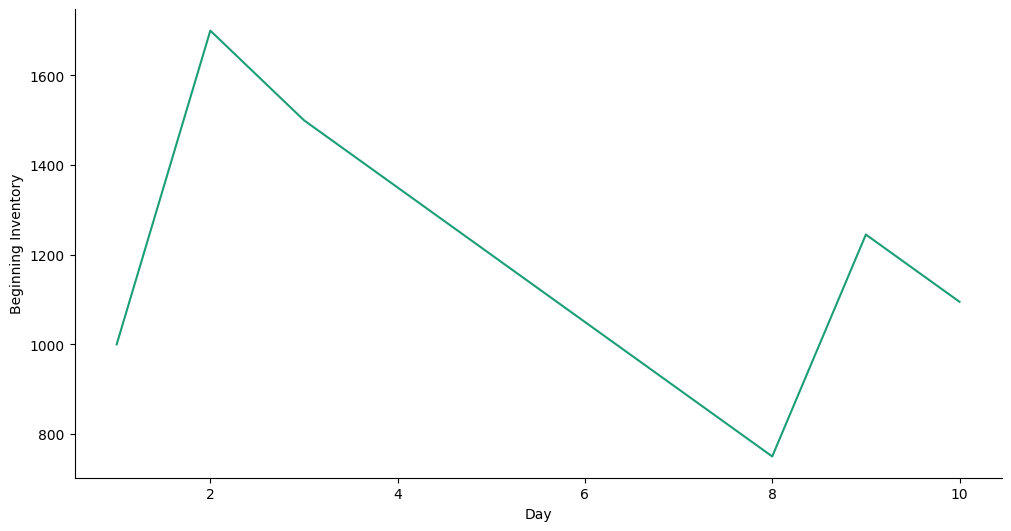

In [24]:
# @title Day vs Beginning Inventory

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Day']
  ys = series['Beginning Inventory']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = inventory_df_10_days.sort_values('Day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Day')
_ = plt.ylabel('Beginning Inventory')

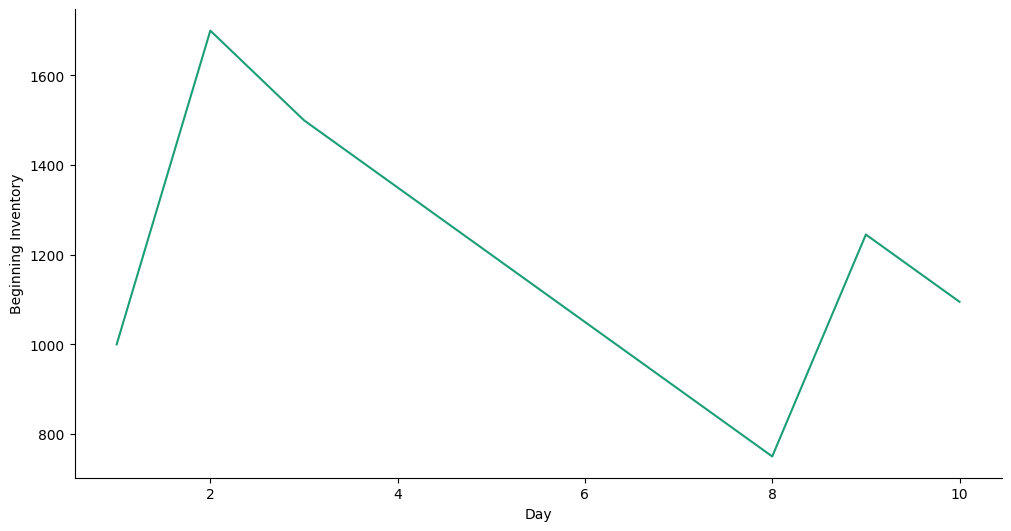

In [25]:
# @title Day vs Beginning Inventory

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Day']
  ys = series['Beginning Inventory']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = inventory_df_10_days.sort_values('Day', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Day')
_ = plt.ylabel('Beginning Inventory')